In [ ]:
! unzip potato.zip

Archive:  potato.zip
  inflating: PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_1.jpg  
  inflating: PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_10.jpg  
  inflating: PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_100.jpg  
  inflating: PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_101.jpg  
  inflating: PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_102.jpg  
  inflating: PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_103.jpg  
  inflating: PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_104.jpg  
  inflating: PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_105.jpg  
  inflating: PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_106.jpg  
  inflating: PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_107.jpg  
  inflating: PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_108.jpg  
  inflating: PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_109.jpg  
  inflating: PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_11.jpg  
  inflat

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = '/content/drive/My Drive/dataset/PLD_3_Classes_256'

for folder in os.listdir(path):
    print(folder)

Training
Validation
Testing


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
import os

In [7]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   '/content/drive/My Drive/dataset/PLD_3_Classes_256/Training',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

testing_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   '/content/drive/My Drive/dataset/PLD_3_Classes_256/Testing',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   '/content/drive/My Drive/dataset/PLD_3_Classes_256/Validation',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 3251 files belonging to 3 classes.
Found 405 files belonging to 3 classes.
Found 416 files belonging to 3 classes.


In [8]:
class_names = training_dataset.class_names
class_names

['Early_Blight', 'Healthy', 'Late_Blight']

In [9]:
train_data = training_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_data = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = testing_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

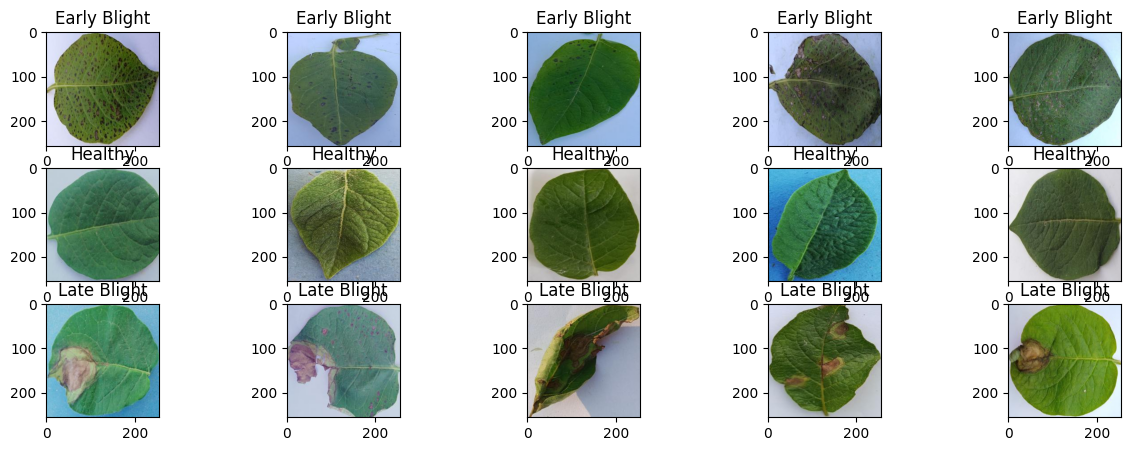

In [10]:
class_names = ['Early_Blight', 'Healthy', 'Late_Blight']

# train_datasets

ely = os.path.join('/content/drive/My Drive/dataset/PLD_3_Classes_256/Training/Early_Blight')
heal = os.path.join("/content/drive/My Drive/dataset/PLD_3_Classes_256/Training/Healthy")
late = os.path.join("/content/drive/My Drive/dataset/PLD_3_Classes_256/Training/Late_Blight")

ely_img = [os.path.join(ely, i) for i in os.listdir(ely)]
heal_img = [os.path.join(heal, i) for i in os.listdir(heal)]
late_img = [os.path.join(late, i) for i in os.listdir(late)]


f, axarr = plt.subplots(3, 5, figsize=(15,5))
for i in range(5):
    img = mpimg.imread(ely_img[i])
    axarr[0, i].imshow(img)
    axarr[0, i].set_title("Early Blight")

for i in range(5):
    img = mpimg.imread(heal_img[i])
    axarr[1, i].imshow(img)
    axarr[1, i].set_title("Healthy")

for i in range(5):
    img = mpimg.imread(late_img[i])
    axarr[2, i].imshow(img)
    axarr[2, i].set_title("Late Blight")

plt.show()

In [11]:
train_data = training_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_data = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = testing_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
resize_scale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [13]:
input_shape = (32, IMAGE_SIZE, IMAGE_SIZE, 3)

model = tf.keras.Sequential([
    resize_scale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(len(class_names),activation='softmax'),
])
model.build(input_shape=input_shape)

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [17]:
model.fit(
    training_dataset,
    epochs=5,
    batch_size=32,
    verbose=1,
    validation_data=validation_dataset
)

Epoch 1/5
102/102 [==============================] - 543s 5s/step - loss: 1.0258 - accuracy: 0.4660 - val_loss: 0.9234 - val_accuracy: 0.5649
Epoch 2/5
102/102 [==============================] - 458s 4s/step - loss: 0.9008 - accuracy: 0.6109 - val_loss: 0.7082 - val_accuracy: 0.7548
Epoch 3/5
102/102 [==============================] - 446s 4s/step - loss: 0.6985 - accuracy: 0.7315 - val_loss: 0.5771 - val_accuracy: 0.7692
Epoch 4/5
102/102 [==============================] - 454s 4s/step - loss: 0.4732 - accuracy: 0.8234 - val_loss: 0.4610 - val_accuracy: 0.8413
Epoch 5/5
102/102 [==============================] - 454s 4s/step - loss: 0.3451 - accuracy: 0.8763 - val_loss: 0.2642 - val_accuracy: 0.9014


In [18]:
model.evaluate(test_data)

13/13 [==============================] - 53s 1s/step - loss: 0.2551 - accuracy: 0.9111


[0.25506791472435, 0.9111111164093018]

In [44]:
for image_batch,label_batch in test_data.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    print("The Image Title : ",class_names[label_batch[0].numpy()])
    prediction = model.predict(image_batch)
    print("Model Predicted label : ",class_names[np.argmax(prediction[0])])

TypeError: ignored

In [37]:
label_batch

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 1, 1, 2, 2, 2, 1, 0, 2,
       2, 0, 2, 2, 1, 0, 1, 0, 2, 0], dtype=int32)>

In [33]:
prediction[0]

array([0.9774748 , 0.02105199, 0.00147326], dtype=float32)

In [28]:
np.argmax(prediction[0])

0

In [34]:
model.save('my_new__model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [68]:
model = tf.keras.models.load_model('my_new__model.h5')

test_data = tf.keras.preprocessing.image.load_img('Healthy_1.jpg')
test_data = tf.keras.preprocessing.image.img_to_array(test_data)
test_data = test_data.reshape((1, 256, 256, 3))

predictions = model.predict(test_data)

confidence = max(predictions[0])

print("Model Predicted label : ",class_names[np.argmax(confidence)])
print(f'Уверенность модели: {confidence}')

1/1 [==============================] - 0s 145ms/step
Model Predicted label :  Early_Blight
Уверенность модели: 0.6882334351539612


In [70]:
predictions

array([[0.68823344, 0.29741347, 0.01435316]], dtype=float32)

In [69]:
if np.where(predictions[0] == max(predictions[0]))[0] == 0:
    print("Early Blight: ", predictions[0][0])
elif np.where(predictions[0] == max(predictions[0]))[0] == 1:
    print("Healthy: ", predictions[0][1])
elif np.where(predictions[0] == max(predictions[0]))[0] == 2:
    print("Late Blight: ", predictions[0][2])

Early Blight:  0.68823344


In [61]:
np.where(predictions[0] == max(predictions[0]))

(array([1]),)

In [66]:
def predict_img(img):
    model = tf.keras.models.load_model('my_new__model.h5')

    test_data = tf.keras.preprocessing.image.load_img(img)
    test_data = tf.keras.preprocessing.image.img_to_array(test_data)
    test_data = test_data.reshape((1, 256, 256, 3))

    predictions = model.predict(test_data)

    if np.where(predictions[0] == max(predictions[0]))[0] == 0:
        return ("Early Blight: ", predictions[0][0])
    elif np.where(predictions[0] == max(predictions[0]))[0] == 1:
        return ("Healthy: ", predictions[0][1])
    elif np.where(predictions[0] == max(predictions[0]))[0] == 2:
        return ("Late Blight: ", predictions[0][2])

In [67]:
predict_img('Healthy_1.jpg')

1/1 [==============================] - 0s 149ms/step


('Early Blight: ', 0.68823344)